#### IE0005: Introduction to Data Science and Artificial Intelligent - Mini Project

# Topic: Predicting hitlist and playlist based on song features

* Tutorial Group: EL10
* Members:
    1. Gabrielle Nicole Suharjono (U2120811H)
    2. Edmerson Low Soon Xiang (U2120302E)

## 1. Importing

### 1.1 Importing Basic Libraries

In [1650]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.simplefilter(action='ignore')

import plotly.express as px
from collections import Counter


### 1.2 Importing Dataset

Dataset Downloaded from Kaggle : The Spotify Hit Predictor Dataset (1960-2019)

Source: https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset

> **track** : Name of the track  
> **artist** : The Name of the Artist  
> **uri** : The resource identifier for the track  
> **danceability** : how suitable a track is for dancing based on a combination of musical elements  
> **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity   
> **key** : The estimated overall key of the track. E.g. 0 = C, 1 = C#, 2 = D, and so on. If no key was detected, the value is -1.  
> **loudness** : The overall loudness of a track in decibels (dB)  
> **mode** : Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0.  
> **speechiness** : Speechiness detects the presence of spoken words in a track  
> **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic   
> **instrumentalness** : Predicts whether a track contains no vocals    
> **liveness** : Detects the presence of an audience in the recording   
> **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track   
> **tempo** : The overall estimated tempo of a track in beats per minute (BPM)   
> **duration_ms** : The duration of the track in milliseconds    
> **time_signature** : An estimated overall time signature of a track    
> **chorus_hit** : This the the author's best estimate of when the chorus would start for the track    
> **sections** : The number of sections the particular track has      
> **target** : The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop' 

In [1651]:
df90s = pd.read_csv('data/dataset-of-90s.csv')
df90s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [1652]:
df00s = pd.read_csv('data/dataset-of-00s.csv')
df00s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [1653]:
df10s = pd.read_csv('data/dataset-of-10s.csv')
df10s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


### 1.3 Add New Column for Decade

In [1654]:
df90s['decade'] = pd.Series(1990, index=df90s.index)
df00s['decade'] = pd.Series(2000, index=df00s.index)
df10s['decade'] = pd.Series(2010, index=df10s.index)

In [1655]:
df90s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.031,0.693,0.00699,0.168,0.543,116.211,158840,4,53.89523,6,0,1990


In [1656]:
df00s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.27,1,0.0289,0.368,0.0,0.159,0.532,133.061,196707,4,30.88059,13,1,2000


In [1657]:
df10s.head(1)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010


### 1.4 Concatenate Data for All Decade

In [1658]:
df = pd.concat([df90s,df00s,df10s], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Gypsy,Shakira,spotify:track:3FESsHW8mAuiIsYpK6aJ6u,0.763,0.758,6,-5.106,1,0.0576,0.64000,0.00000,0.0706,0.515,92.727,198827,4,31.45224,10,1,2010
1,Sirena,Faun,spotify:track:0SUs7qqfixfBQjKiv4YNNH,0.537,0.631,7,-12.199,1,0.0322,0.00676,0.00849,0.1530,0.158,134.960,311480,5,32.25945,12,0,2000
2,Same Girl,R. Kelly Duet With Usher,spotify:track:6OSmeoh8kXhCfz9WqvzDoJ,0.717,0.583,1,-5.008,1,0.1460,0.50600,0.00000,0.0821,0.816,139.760,252933,4,31.52992,10,1,2000
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,spotify:track:1CdYprGrbKNlhgFUX3nHTy,0.264,0.745,1,-5.651,1,0.1470,0.00122,0.03080,0.9270,0.220,173.038,292813,4,57.25540,14,0,2010
4,I Can Make It Better,Luther Vandross,spotify:track:70NmePXQxL3b688VuLSFae,0.714,0.497,0,-7.643,1,0.0344,0.28500,0.00000,0.0668,0.671,95.817,335480,3,25.39514,15,1,1990


## 2. Data Cleaning

### 2.1 Checking for Missing Data

In [1659]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17790, 20)


In [1660]:
#Calculating the Percentage of Missing Values for Each Variable
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

track - 0.0%
artist - 0.0%
uri - 0.0%
danceability - 0.0%
energy - 0.0%
key - 0.0%
loudness - 0.0%
mode - 0.0%
speechiness - 0.0%
acousticness - 0.0%
instrumentalness - 0.0%
liveness - 0.0%
valence - 0.0%
tempo - 0.0%
duration_ms - 0.0%
time_signature - 0.0%
chorus_hit - 0.0%
sections - 0.0%
target - 0.0%
decade - 0.0%


**Comment** - Looking at the percentage values, there are `no missing values` for all variables in the dataset

### 2.2 Converting miliseconds duration into minutes

In [1661]:
df['duration_min'] = df['duration_ms']/60000
df['duration_min'] = df['duration_min'].round(2)
df['duration_min'].head()

0    3.31
1    5.19
2    4.22
3    4.88
4    5.59
Name: duration_min, dtype: float64

In [1662]:
df90s['duration_min'] = df['duration_ms']/60000
df90s['duration_min'] = df['duration_min'].round(2)

df00s['duration_min'] = df00s['duration_ms']/60000
df00s['duration_min'] = df00s['duration_min'].round(2)

df10s['duration_min'] = df10s['duration_ms']/60000
df10s['duration_min'] = df10s['duration_min'].round(2)

In [1663]:
# Drop duration in miliseconds
df = df.drop(['duration_ms'], axis = 1)

In [1664]:
df90s = df90s.drop(['duration_ms'], axis = 1)
df00s = df00s.drop(['duration_ms'], axis = 1)
df10s = df10s.drop(['duration_ms'], axis = 1)

### 2.3 Checking for duplicated data

In [1665]:
df.duplicated().sum()

0

**Comment** - There are not any `duplicates data` in the dataframe but this may be caused by the unique `uri` feature

In [1666]:
df = df.drop(labels=['uri'], axis=1)
df.shape

(17790, 19)

In [1667]:
df.duplicated().sum()

138

**Comment** - After removing `uri` feature, it is found that there are 138 duplicates in the dataset, which need to be removed. Below is the (a portion of) list of duplicated data:

In [1668]:
df[df.duplicated()].head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,target,decade,duration_min
1145,She's a Carioca (Remastered),Stanley Turrentine,0.507,0.328,4,-12.770,0,0.0306,0.911000,0.858,0.1050,0.208,114.769,4,16.66228,21,0,2010,6.52
1320,From the Flames,Memoriam,0.525,0.602,6,-15.015,1,0.0466,0.002470,0.572,0.1040,0.146,80.057,4,46.31089,12,0,2010,5.66
1526,Black Hole Metal,Black Crucifixion,0.349,0.959,10,-3.854,1,0.0570,0.000024,0.750,0.3580,0.257,94.977,4,65.36389,8,0,2010,3.08
2138,Feeling Punk - Asle Remix,Todd Terry,0.739,0.772,4,-10.172,1,0.0900,0.001260,0.708,0.0751,0.699,122.997,4,97.57510,8,0,2010,5.76
2270,All Pride No Pain,Upon A Burning Body,0.594,0.933,4,-6.072,0,0.1980,0.000170,0.359,0.2640,0.159,108.041,4,25.19260,8,0,2010,3.46


In [1669]:
df = df.drop_duplicates()
df.shape

(17652, 19)

**Comment** - Thus, we dropped the 138 duplicated columns

In [1670]:
df.duplicated().sum()

0

### 2.4 Changing 0 and 1 to Boolean Values

From the data description in Kaggle, we understand that the features below is a boolean data type:
> **mode** : Mode indicates the modality (major or minor) of a track. '0' for minor and '1' for major   
> **target** : The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop' 

Therefore, we need to change the 0 and 1 to False and True to avoid confusion

In [1671]:
df["target"].replace(0, False, inplace=True)
df["target"].replace(1, True, inplace=True)
df["target"].head()

0     True
1    False
2     True
3    False
4     True
Name: target, dtype: bool

In [1672]:
df90s["target"].replace(0, False, inplace=True)
df90s["target"].replace(1, True, inplace=True)


df00s["target"].replace(0, False, inplace=True)
df00s["target"].replace(1, True, inplace=True)


df10s["target"].replace(0, False, inplace=True)
df10s["target"].replace(1, True, inplace=True)

In [1673]:
df["mode"].replace(0, False, inplace=True)
df["mode"].replace(1, True, inplace=True)
df["mode"].head()

0    True
1    True
2    True
3    True
4    True
Name: mode, dtype: bool

In [1674]:
df90s["mode"].replace(0, False, inplace=True)
df90s["mode"].replace(1, True, inplace=True)

df00s["mode"].replace(0, False, inplace=True)
df00s["mode"].replace(1, True, inplace=True)

df10s["mode"].replace(0, False, inplace=True)
df10s["mode"].replace(1, True, inplace=True)

### 2.5 Change Column Name

The current dataset has the `target` features which indicate if the songs is `hit` or `flop` (popular or not). It will be easier to understand if we change the column name from target to `hitlist`. We also change the column name `mode` to `major`.

In [1675]:
df.rename(columns={'target': 'hitlist'}, inplace=True)
df.rename(columns={'mode': 'major'}, inplace=True)

In [1676]:
df90s.rename(columns={'target': 'hitlist'}, inplace=True)
df90s.rename(columns={'mode': 'major'}, inplace=True)

df00s.rename(columns={'target': 'hitlist'}, inplace=True)
df00s.rename(columns={'mode': 'major'}, inplace=True)

df10s.rename(columns={'target': 'hitlist'}, inplace=True)
df10s.rename(columns={'mode': 'major'}, inplace=True)

In [1677]:
df.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,6,-5.106,True,0.0576,0.64000,0.00000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
1,Sirena,Faun,0.537,0.631,7,-12.199,True,0.0322,0.00676,0.00849,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,1,-5.008,True,0.1460,0.50600,0.00000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,1,-5.651,True,0.1470,0.00122,0.03080,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
4,I Can Make It Better,Luther Vandross,0.714,0.497,0,-7.643,True,0.0344,0.28500,0.00000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59


### 2.6 Change Key Column from numerical to categorical data

In [1678]:
df.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

In [1679]:
df.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.64000,0.00000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
1,Sirena,Faun,0.537,0.631,G,-12.199,True,0.0322,0.00676,0.00849,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,C#,-5.008,True,0.1460,0.50600,0.00000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.00122,0.03080,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
4,I Can Make It Better,Luther Vandross,0.714,0.497,C,-7.643,True,0.0344,0.28500,0.00000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59


In [1680]:
df10s = df[df['decade']==2010]

df10s

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.640000,0.000000,0.0706,0.5150,92.727,4,31.45224,10,True,2010,3.31
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.001220,0.030800,0.9270,0.2200,173.038,4,57.25540,14,False,2010,4.88
5,Questions,Chris Brown,0.614,0.598,A#,-6.335,False,0.0561,0.005430,0.000000,0.1000,0.5650,105.803,4,43.76138,6,True,2010,2.16
7,Another Round,Fat Joe Featuring Chris Brown,0.271,0.762,F#,-6.277,False,0.2750,0.071900,0.000000,0.1430,0.4100,80.248,4,49.06984,12,True,2010,4.81
9,Doabey Wala,Garry Sandhu,0.804,0.795,B,-2.951,False,0.1100,0.016000,0.000000,0.2000,0.3360,98.041,4,29.42124,9,False,2010,3.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17774,Powerpigs,Wolfpack,0.205,0.985,F,-4.297,False,0.1160,0.000001,0.752000,0.1190,0.0515,184.129,4,39.79385,10,False,2010,3.00
17778,Längtans café,Lasse Stefanz,0.704,0.666,C,-7.092,True,0.0237,0.276000,0.000004,0.0992,0.8300,108.916,4,18.62954,11,False,2010,3.98
17782,Born to Play Metal,Fireforce,0.376,0.971,C,-3.874,True,0.0587,0.000043,0.000054,0.0695,0.2530,182.131,4,16.45581,12,False,2010,3.54
17786,House Party,Aaron Smith,0.760,0.772,C#,-4.872,True,0.0935,0.029400,0.012400,0.3610,0.6740,121.996,4,27.05950,14,False,2010,6.56


## 3. Exploratory Analysis

### 3.1 General Information of Datasets

In [1681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17652 entries, 0 to 17789
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             17652 non-null  object 
 1   artist            17652 non-null  object 
 2   danceability      17652 non-null  float64
 3   energy            17652 non-null  float64
 4   key               17652 non-null  object 
 5   loudness          17652 non-null  float64
 6   major             17652 non-null  bool   
 7   speechiness       17652 non-null  float64
 8   acousticness      17652 non-null  float64
 9   instrumentalness  17652 non-null  float64
 10  liveness          17652 non-null  float64
 11  valence           17652 non-null  float64
 12  tempo             17652 non-null  float64
 13  time_signature    17652 non-null  int64  
 14  chorus_hit        17652 non-null  float64
 15  sections          17652 non-null  int64  
 16  hitlist           17652 non-null  bool  

#### 'Hit' songs in the Dataset

In [1682]:
# Number of artist in the Dataset
print("Number of unique artist :", len(df["artist"].unique()))

# Popular tracks in the Dataset
hit_data = df[df["hitlist"] == True]
print("Number of 'Hit' Tracks :", len(hit_data))

Number of unique artist : 7926
Number of 'Hit' Tracks : 8895


True     8895
False    8757
Name: hitlist, dtype: int64


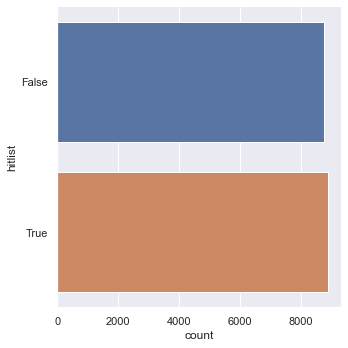

In [1683]:
print(df["hitlist"].value_counts())
sb.catplot(y = "hitlist", data = df, kind = "count")

**Comment** - There are only 7926 unique artists from 17652 songs in the dataset. This shows that the dataset contains a few different songs from one artist. From the countplot, it can be seen that there are 8895 'hit' songs and 8757 'flop' songs.

### 3.2 Observation for Top Artists

#### Top 10 Artist with Most Number of Songs

Text(0.5, 0, 'Number of Song')

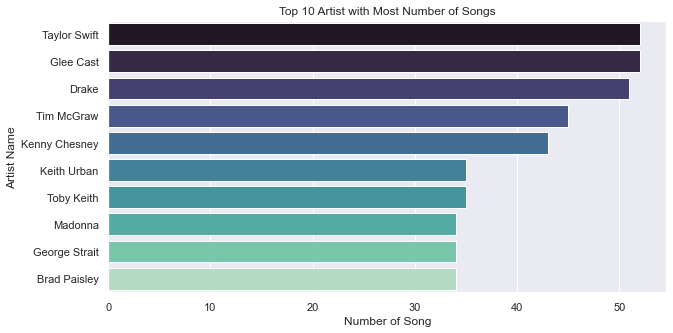

In [1684]:
most_songs = df['artist'].value_counts().head(10)
axis = sb.barplot(most_songs, most_songs.index, palette="mako", orient = 'h')
axis.set_title('Top 10 Artist with Most Number of Songs')
axis.set_ylabel('Artist Name')
axis.set_xlabel('Number of Song')

**Comment** - From the list above, it can be seen that `Taylor Swift` and `Glee Cast` are the artists that produced most number of songs in 1990 - 2010. However, it does not necessarily mean that these artists produce the most hitlist songs.

#### To 10 Artists with Most HITLIST Songs

In [1685]:
most_hitlist_songs = df.groupby("artist")['hitlist'].sum().sort_values(ascending=False).head(10)
print("TOP 10 ARTIST WITH MOST HITLIST SONGS:")
most_hitlist_songs

TOP 10 ARTIST WITH MOST HITLIST SONGS:


artist
Glee Cast        52
Taylor Swift     52
Drake            51
Tim McGraw       45
Kenny Chesney    43
Keith Urban      35
Toby Keith       35
Brad Paisley     34
George Strait    34
Madonna          34
Name: hitlist, dtype: int64

Text(0.5, 0, 'Number of Popular Song')

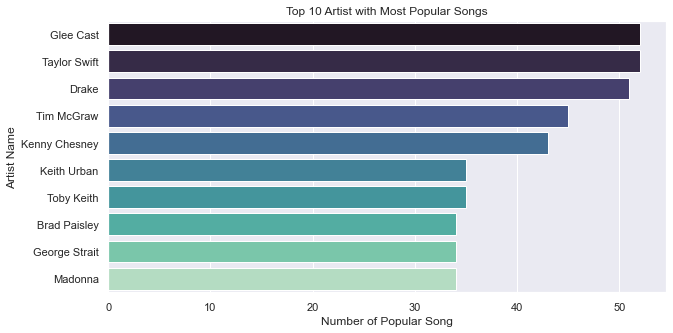

In [1686]:
axis = sb.barplot(most_hitlist_songs, most_hitlist_songs.index, palette="mako", orient = 'h')
axis.set_title('Top 10 Artist with Most Popular Songs')
axis.set_ylabel('Artist Name')
axis.set_xlabel('Number of Popular Song')

**Comment** - From the list above, it can be seen that `Taylor Swift` and `Glee Cast` are the artists that produced most songs that is inside the hitlist in 1990 - 2010.

**Comment** - It can be seen that the list for artists with `most number of songs` and artist with `most hitlist songs` are identical. Let's try to see if there is a difference for top 20 list. 

#### Top 20 Artist with Most Number of Songs

In [1687]:
top20_most_songs = df['artist'].value_counts().head(20)
freqArtist = pd.DataFrame(top20_most_songs)
freqArtist = freqArtist.reset_index()
freqArtist.rename(columns={'index': 'Artist Name', 'artist': 'Frequency'}, inplace = True)
freqArtist.index += 1
freqArtist

,Artist Name,Frequency
1,Taylor Swift,52
2,Glee Cast,52
3,Drake,51
4,Tim McGraw,45
5,Kenny Chesney,43
6,Keith Urban,35
7,Toby Keith,35
8,Madonna,34
9,George Strait,34
10,Brad Paisley,34


In [1688]:
px.bar(data_frame=freqArtist, x='Artist Name', y='Frequency', color = "Frequency", height=400)

#### Top 20 Artists with Most HITLIST Songs

In [1689]:
top20_hitlist_songs = df.groupby("artist")['hitlist'].sum().sort_values(ascending=False).head(20)
freqHitlist = pd.DataFrame(top20_hitlist_songs)
freqHitlist = freqHitlist.reset_index()
freqHitlist.rename(columns={'artist': 'Artist Name', 'hitlist': 'Hitlist Frequency'}, inplace = True)
freqHitlist.index += 1
freqHitlist

,Artist Name,Hitlist Frequency
1,Glee Cast,52
2,Taylor Swift,52
3,Drake,51
4,Tim McGraw,45
5,Kenny Chesney,43
6,Keith Urban,35
7,Toby Keith,35
8,Brad Paisley,34
9,George Strait,34
10,Madonna,34


In [1690]:
px.bar(data_frame=freqHitlist, x='Artist Name', y='Hitlist Frequency', color = "Hitlist Frequency", height=400)

**Comment** - There is noticeable different in both top 20 lists. For example, `Johan Sebastian Bach` composed 30 songs in total, but not all of his songs was inside the hitlist. While `Alan Jackson` was not in the top 20 artist producing most songs, but all 25 of his songs was inside the hitlist.

### 3.3 Observation for Key Column

#### Most Used Key in All Tracks

G     2013
C     1983
C#    1853
D     1759
A     1671
F     1429
B     1406
E     1337
F#    1288
A#    1188
G#    1162
D#     563
Name: key, dtype: int64


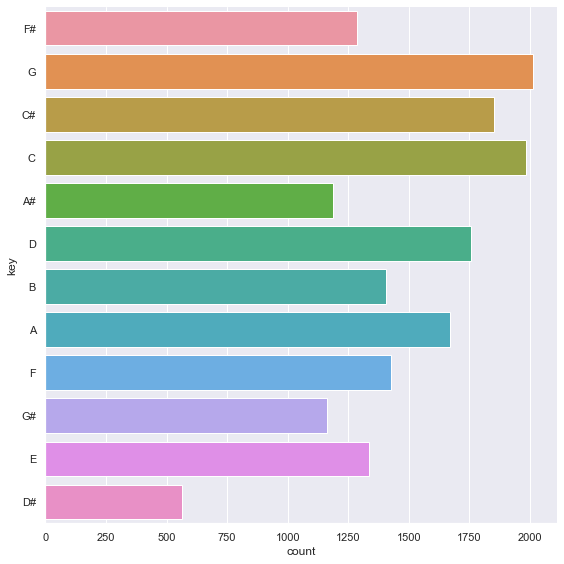

In [1691]:
print(df["key"].value_counts())
sb.catplot(y = "key", data = df, kind = "count", height = 8)

In [1692]:
d1_freqKey = dict(Counter(df['key'].values))
freqKey = pd.DataFrame(list(d1_freqKey.items()), columns = ['Key', 'Frequency'])
freqKey

,Key,Frequency
0,F#,1288
1,G,2013
2,C#,1853
3,C,1983
4,A#,1188
5,D,1759
6,B,1406
7,A,1671
8,F,1429
9,G#,1162


In [1693]:
px.pie(freqKey, values='Frequency', names='Key')

In [1694]:
px.treemap(data_frame=freqKey, path=['Key'], values='Frequency', color='Frequency')

**Comment** - It can be seen that most songs (2013 songs) in 1990 - 2010 used G key, followed by C key (1983 songs) and C# Key (1853 songs)

### 3.4 Numerical Analysis

In [1695]:
dfNumeric = df.drop(["track", "artist", "key", "major", "hitlist", "time_signature", "decade"], axis = 1)
dfNumeric.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,chorus_hit,sections,duration_min
0,0.763,0.758,-5.106,0.0576,0.64000,0.00000,0.0706,0.515,92.727,31.45224,10,3.31
1,0.537,0.631,-12.199,0.0322,0.00676,0.00849,0.1530,0.158,134.960,32.25945,12,5.19
2,0.717,0.583,-5.008,0.1460,0.50600,0.00000,0.0821,0.816,139.760,31.52992,10,4.22
3,0.264,0.745,-5.651,0.1470,0.00122,0.03080,0.9270,0.220,173.038,57.25540,14,4.88
4,0.714,0.497,-7.643,0.0344,0.28500,0.00000,0.0668,0.671,95.817,25.39514,15,5.59


In [1696]:
dfNumeric.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,chorus_hit,sections,duration_min
count,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000
mean,0.559866,0.656133,-8.357624,0.088782,0.239289,0.157417,0.196809,0.486677,121.021242,40.905438,10.802459,4.159004
std,0.187507,0.245832,5.306380,0.092787,0.307296,0.307654,0.167445,0.255093,29.905685,19.910653,4.731114,1.861358
min,0.057600,0.000251,-49.253000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,0.000000,1.000000,0.270000
25%,0.438000,0.505000,-9.903000,0.035700,0.009020,0.000000,0.093800,0.279000,97.114500,27.884680,8.000000,3.330000
50%,0.577000,0.700000,-6.896500,0.050400,0.082200,0.000043,0.128000,0.488000,119.838000,36.253575,10.000000,3.890000
75%,0.697000,0.856000,-5.028750,0.096700,0.377000,0.058100,0.257000,0.691000,140.001000,48.262235,12.000000,4.610000
max,0.986000,0.999000,1.137000,0.956000,0.996000,0.998000,0.992000,0.996000,217.943000,262.615400,169.000000,69.500000


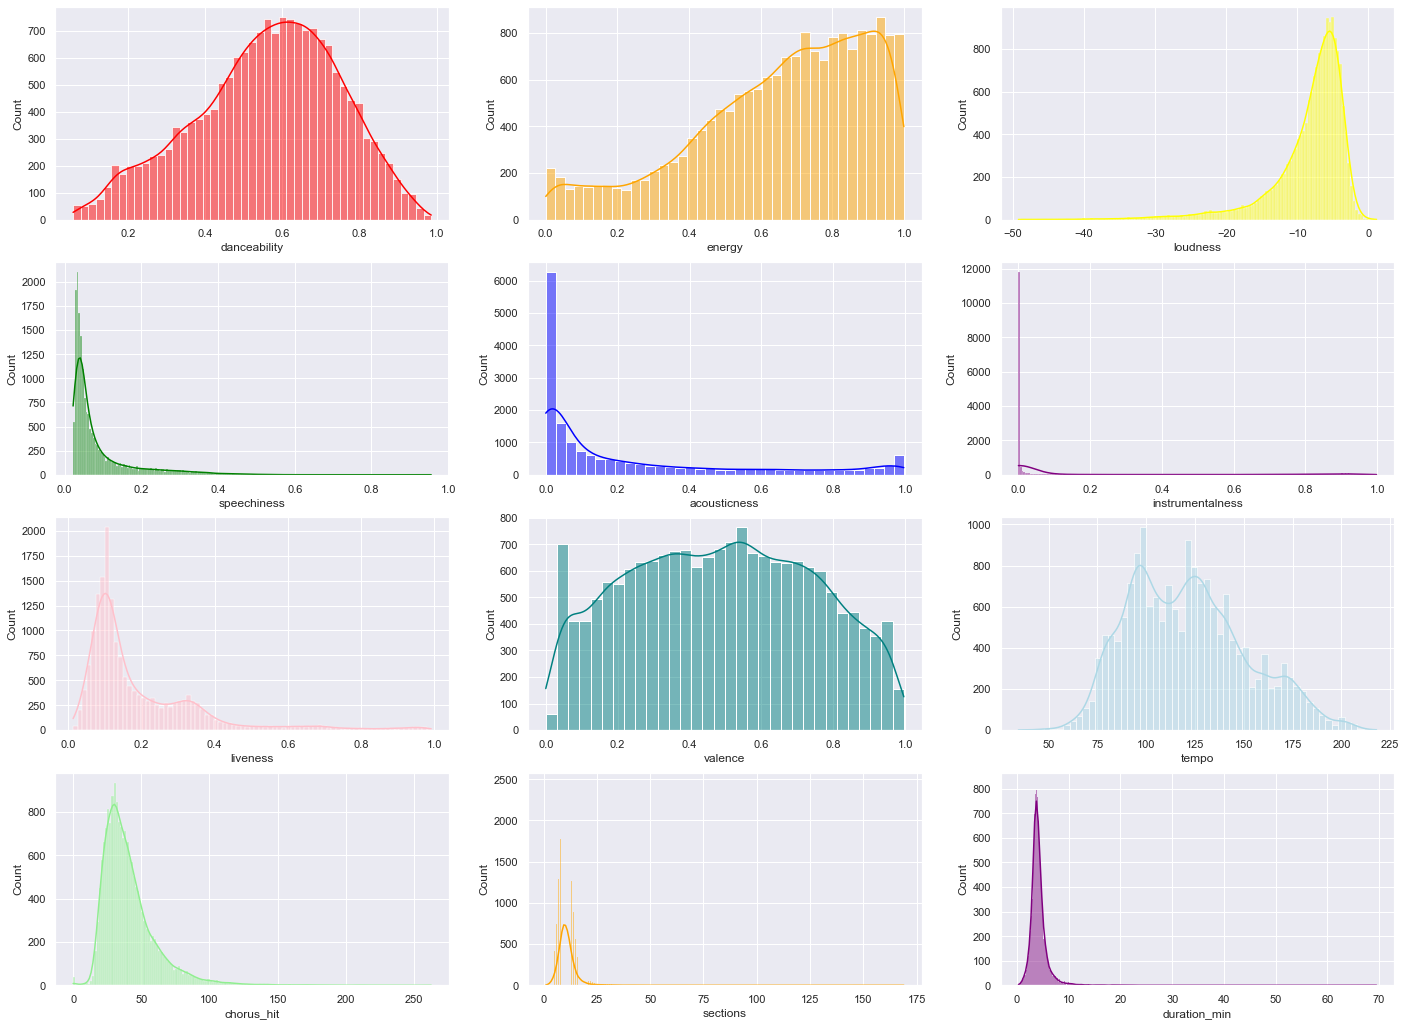

In [1697]:
color = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "teal", "lightblue", "lightgreen", "orange", "purple"]
f, axes = plt.subplots(4, 3, figsize=(24, 18))
i, j, count = 0, 0, 0
for var in dfNumeric:
    sb.histplot(dfNumeric[var], color = color[count], ax = axes[i,j], kde = True)
    if i == 3 and j == 3:
        break
    count += 1
    if j == 2:
        j = 0
        i += 1
    else: j += 1

<AxesSubplot:>

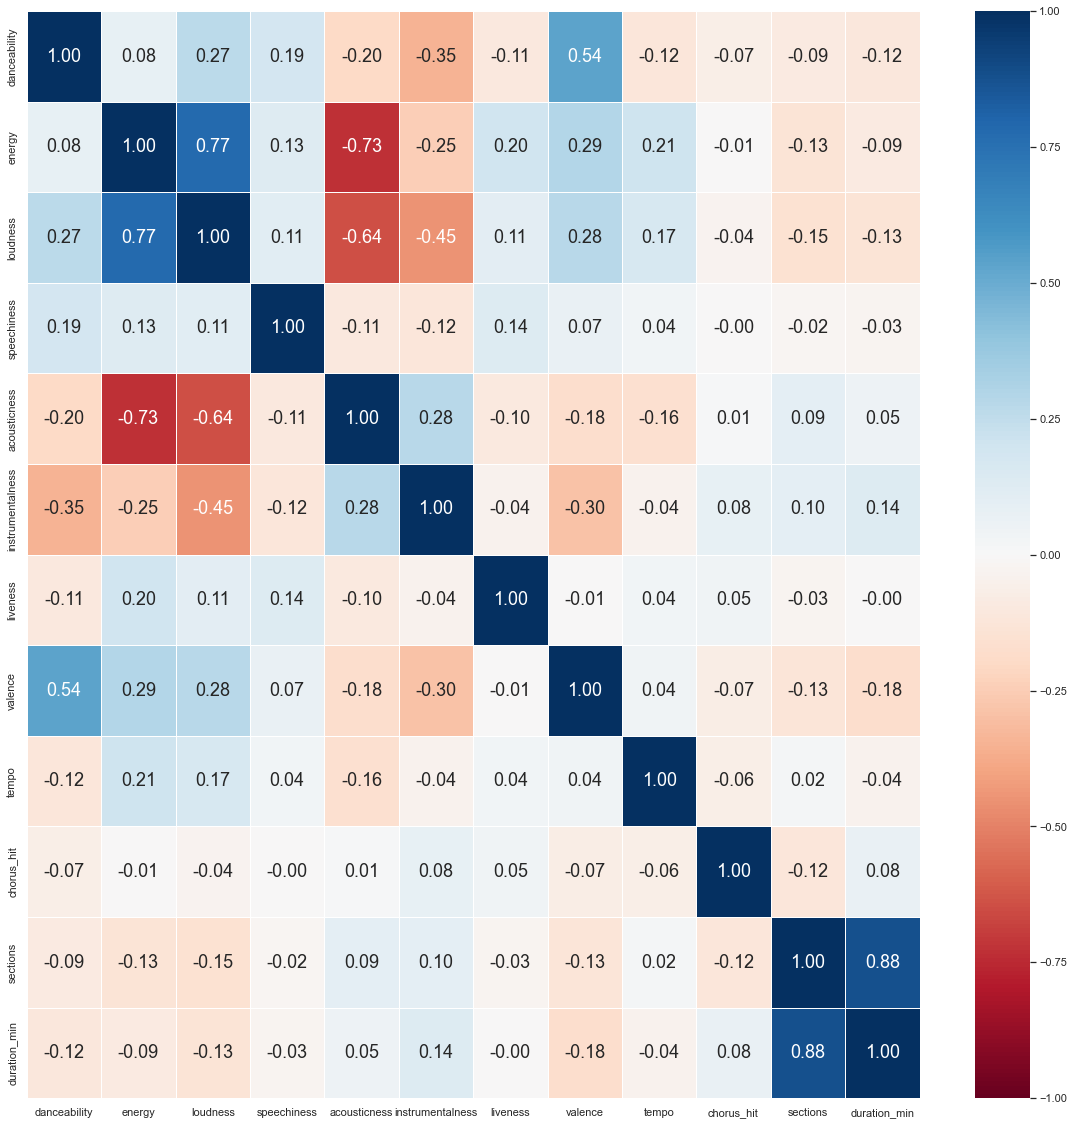

In [1698]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(dfNumeric.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Comment** - From the correlation matrix, it can be seen that `sections` and `duration_min` has the strongest correlation, at 0.88. Followed, by `loudness` and `danceability`, at 0.77. There is also a strong negative correlation between `accousticness` and `energy`, at -0.73.

### 3.5 Audio Charactersitics

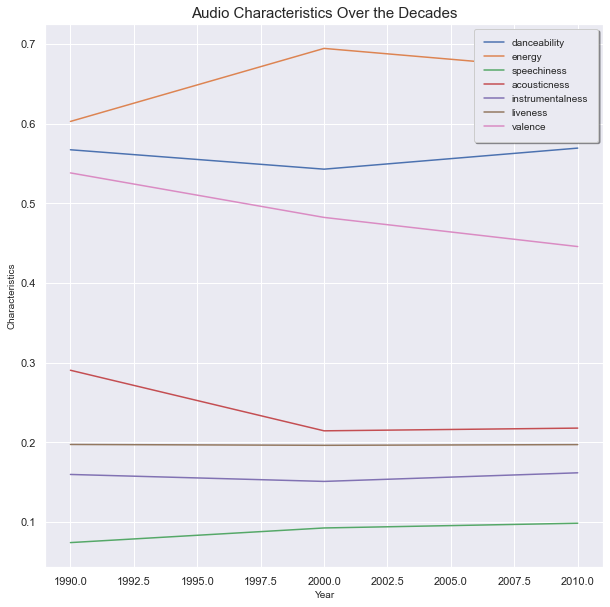

In [1699]:
columns = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]
plt.figure(figsize=(10,10))
for feature in columns:
    x = df.groupby('decade')[feature].mean()
    sb.lineplot(x.index,x,label=feature)
plt.title('Audio Characteristics Over the Decades', fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Characteristics',fontsize=10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
plt.show()

### 3.6 Comparing between decades

In [1700]:
#### Dataframe for 90s
df90s.clean = df[df['decade'] == 1990]
df90s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
4,I Can Make It Better,Luther Vandross,0.714,0.497,C,-7.643,True,0.0344,0.285000,0.000000,0.0668,0.671,95.817,3,25.39514,15,True,1990,5.59
14,The New Democracy,The Nashville Bluegrass Band,0.513,0.429,D,-15.271,True,0.0336,0.471000,0.950000,0.2910,0.819,142.354,4,74.51253,7,False,1990,2.94
15,(I Want To Be An) Anglepoise Lamp (Live,The Soft Boys,0.409,0.929,A,-7.658,True,0.0685,0.047900,0.000000,0.1560,0.443,89.412,4,81.31047,7,False,1990,2.93
17,Lockdown,Madball,0.401,0.968,B,-6.681,True,0.1240,0.000294,0.000451,0.1210,0.278,90.226,4,51.03063,5,False,1990,1.75
19,She's A River,Simple Minds,0.370,0.854,D,-7.018,True,0.0812,0.001470,0.000006,0.0586,0.181,184.068,4,29.65163,17,True,1990,5.54


In [1701]:
featureDict90s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict90s_mean[f] = df90s.clean[f].mean()

dfFeature90s = pd.DataFrame(list(featureDict90s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature90s['decade'] = pd.Series(1990, index=dfFeature90s.index)
dfFeature90s

,Feature,Characteristics,decade
0,danceability,0.567208,1990
1,energy,0.602767,1990
2,speechiness,0.074033,1990
3,acousticness,0.290393,1990
4,instrumentalness,0.159582,1990
5,liveness,0.197227,1990
6,valence,0.538153,1990


In [1702]:
#### Dataframe for 00s
df00s.clean = df[df['decade'] == 2000]
df00s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
1,Sirena,Faun,0.537,0.631,G,-12.199,True,0.0322,0.00676,0.008490,0.1530,0.158,134.960,5,32.25945,12,False,2000,5.19
2,Same Girl,R. Kelly Duet With Usher,0.717,0.583,C#,-5.008,True,0.1460,0.50600,0.000000,0.0821,0.816,139.760,4,31.52992,10,True,2000,4.22
6,So Sick,Ne-Yo,0.452,0.574,F#,-8.336,True,0.3100,0.24600,0.000000,0.1890,0.580,92.791,4,20.40989,11,True,2000,3.45
8,Forget About the Boy,Sutton Foster,0.456,0.437,D,-9.599,False,0.2580,0.72700,0.000002,0.4600,0.766,200.316,4,28.38139,11,False,2000,3.39
12,Toes,Zac Brown Band,0.800,0.759,B,-5.398,True,0.0378,0.65500,0.000000,0.0897,0.821,129.979,4,29.42405,10,True,2000,4.38


In [1703]:
featureDict00s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict00s_mean[f] = df00s.clean[f].mean()

dfFeature00s = pd.DataFrame(list(featureDict00s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature00s['decade'] = pd.Series(2000, index=dfFeature00s.index)
dfFeature00s

,Feature,Characteristics,decade
0,danceability,0.542847,2000
1,energy,0.694454,2000
2,speechiness,0.092400,2000
3,acousticness,0.214354,2000
4,instrumentalness,0.150838,2000
5,liveness,0.196162,2000
6,valence,0.482277,2000


In [1704]:
#### Dataframe for 10s
df10s.clean = df[df['decade'] == 2010]
df10s.clean.head()

,track,artist,danceability,energy,key,loudness,major,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,hitlist,decade,duration_min
0,Gypsy,Shakira,0.763,0.758,F#,-5.106,True,0.0576,0.64000,0.0000,0.0706,0.515,92.727,4,31.45224,10,True,2010,3.31
3,T-shirt van Metallica - Live @ Graspop Metal M...,Fleddy Melculy,0.264,0.745,C#,-5.651,True,0.1470,0.00122,0.0308,0.9270,0.220,173.038,4,57.25540,14,False,2010,4.88
5,Questions,Chris Brown,0.614,0.598,A#,-6.335,False,0.0561,0.00543,0.0000,0.1000,0.565,105.803,4,43.76138,6,True,2010,2.16
7,Another Round,Fat Joe Featuring Chris Brown,0.271,0.762,F#,-6.277,False,0.2750,0.07190,0.0000,0.1430,0.410,80.248,4,49.06984,12,True,2010,4.81
9,Doabey Wala,Garry Sandhu,0.804,0.795,B,-2.951,False,0.1100,0.01600,0.0000,0.2000,0.336,98.041,4,29.42124,9,False,2010,3.63


In [1705]:
featureDict10s_mean = {}
features = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence"]

for f in features:
    featureDict10s_mean[f] = df10s.clean[f].mean()

dfFeature10s = pd.DataFrame(list(featureDict10s_mean.items()), columns = ['Feature', 'Characteristics'])

dfFeature10s['decade'] = pd.Series(2010, index=dfFeature10s.index)
dfFeature10s

,Feature,Characteristics,decade
0,danceability,0.569289,2010
1,energy,0.667176,2010
2,speechiness,0.098329,2010
3,acousticness,0.217757,2010
4,instrumentalness,0.161648,2010
5,liveness,0.197046,2010
6,valence,0.445692,2010


In [1706]:
# compare_feats_df = pd.concat([dfFeature90s, dfFeature00s['2000'], dfFeature10s['2010']], axis = 1)
# compare_feats_df

In [1707]:
# compare_feats_df = compare_feats_df.pivot_table(index = ['Feature'])
# plot = compare_feats_df.plot(kind='bar', color = ('teal','blue','lightblue'), figsize = (20,8))
# plot.tick_params(labelrotation=0)

In [1708]:
dfNew = pd.concat([dfFeature90s, dfFeature00s, dfFeature10s])
dfNew

,Feature,Characteristics,decade
0,danceability,0.567208,1990
1,energy,0.602767,1990
2,speechiness,0.074033,1990
3,acousticness,0.290393,1990
4,instrumentalness,0.159582,1990
5,liveness,0.197227,1990
6,valence,0.538153,1990
0,danceability,0.542847,2000
1,energy,0.694454,2000
2,speechiness,0.092400,2000


In [1709]:
import plotly.express as px
fig = px.line(dfNew, x="decade", y="Characteristics", color='Feature')
fig.show()

### Machine Learning

In [1710]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [1711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17652 entries, 0 to 17789
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             17652 non-null  object 
 1   artist            17652 non-null  object 
 2   danceability      17652 non-null  float64
 3   energy            17652 non-null  float64
 4   key               17652 non-null  object 
 5   loudness          17652 non-null  float64
 6   major             17652 non-null  bool   
 7   speechiness       17652 non-null  float64
 8   acousticness      17652 non-null  float64
 9   instrumentalness  17652 non-null  float64
 10  liveness          17652 non-null  float64
 11  valence           17652 non-null  float64
 12  tempo             17652 non-null  float64
 13  time_signature    17652 non-null  int64  
 14  chorus_hit        17652 non-null  float64
 15  sections          17652 non-null  int64  
 16  hitlist           17652 non-null  bool  

In [1712]:
columns =  ['danceability', 'energy', 'loudness',
       'major', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit',
       'sections','decade','duration_min']

X1 = df10s[columns]
y1 = df10s['hitlist']

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25,random_state=0) 
RF = RandomForestClassifier()
RF.fit(X1_train, y1_train)
y1_pred = RF.predict(X1_test)
RFprob = RF.predict_proba(X1_test)[::,1]
RFpred = RF.predict(X1_test)

In [1713]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)
cnf_matrix

array([[604, 191],
       [ 83, 694]])

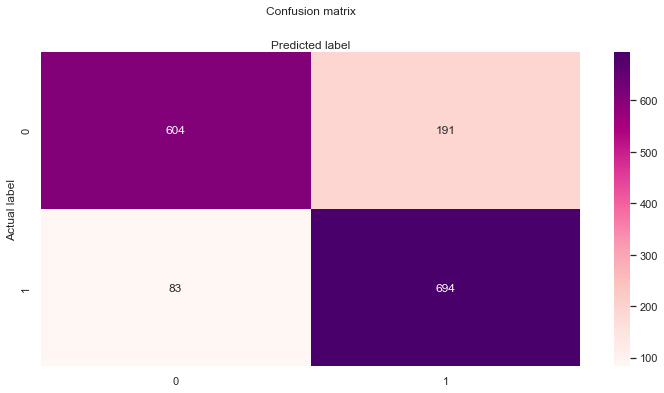

In [1714]:
plt.rcParams['figure.figsize']=(10,5)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [1715]:
tens_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(columns)
df_tens_feat = pd.DataFrame(tens_feat)
tens_feat_vars = pd.concat([df_indep_columns, df_tens_feat], axis = 1)
tens_feat_vars.columns = ['Variable', 'Feature importance 10s']
tens_feat_vars = tens_feat_vars.set_index('Variable')
tens_feat_vars = tens_feat_vars.sort_values(by=['Feature importance 10s'], ascending = False)

In [1716]:
tens_feat_vars

,Feature importance 10s
Variable,
instrumentalness,0.258190
loudness,0.104054
acousticness,0.100366
energy,0.091868
danceability,0.088487
duration_min,0.072601
valence,0.064609
speechiness,0.048021
tempo,0.043843


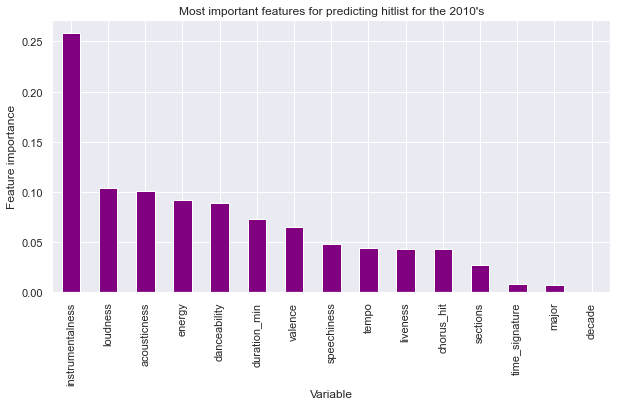

In [1717]:
tens_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hitlist for the 2010's", legend = None)
plt.ylabel('Feature importance')
plt.show()

In [1718]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Precision:",metrics.precision_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))

Accuracy: 0.8256997455470738
Precision: 0.784180790960452
Recall: 0.8931788931788932


In [1789]:
X2 = df90s[columns]
y2 = df90s['hitlist']

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.25,random_state=None)
RF = RandomForestClassifier()
RF.fit(X2_train, y2_train)
y2_pred = RF.predict(X2_test)

cnf_matrix = metrics.confusion_matrix(y2_test, y2_pred)
cnf_matrix

array([[557, 123],
       [ 86, 614]])

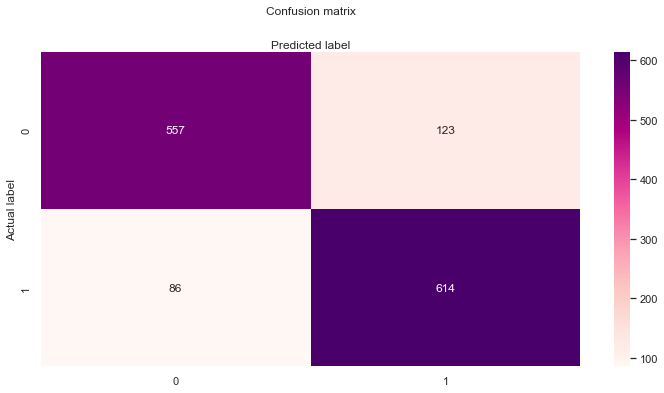

In [1790]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [1791]:
nineties = RF.feature_importances_
df_indep_columns = pd.DataFrame(columns)
df_nineties_feat = pd.DataFrame(nineties)
nineties_feat_vars = pd.concat([df_indep_columns, df_nineties_feat], axis = 1)
nineties_feat_vars.columns = ['Variable', 'Feature importance 90s']
nineties_feat_vars = nineties_feat_vars.set_index('Variable')
nineties_feat_vars = nineties_feat_vars.sort_values(by=['Feature importance 90s'], ascending = False)

In [1792]:

nineties_feat_vars 

,Feature importance 90s
Variable,
instrumentalness,0.151977
danceability,0.147992
acousticness,0.147400
loudness,0.083364
energy,0.074164
valence,0.068755
speechiness,0.066645
sections,0.059986
tempo,0.052529


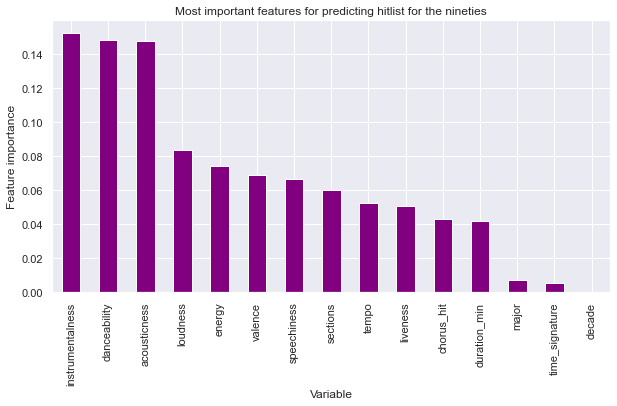

In [1805]:
nineties_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hitlist for the nineties", legend = None)
plt.ylabel('Feature importance')
plt.show()

In [1806]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Precision:",metrics.precision_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))

Accuracy: 0.8485507246376811
Precision: 0.8331071913161465
Recall: 0.8771428571428571


In [1807]:
X3 = df00s[columns]
y3 = df00s['hitlist']

X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.25,random_state=0)
RF = RandomForestClassifier()
RF.fit(X3_train, y3_train)
y3_pred = RF.predict(X3_test)

cnf_matrix = metrics.confusion_matrix(y3_test, y3_pred)
cnf_matrix


array([[612, 116],
       [ 90, 650]])

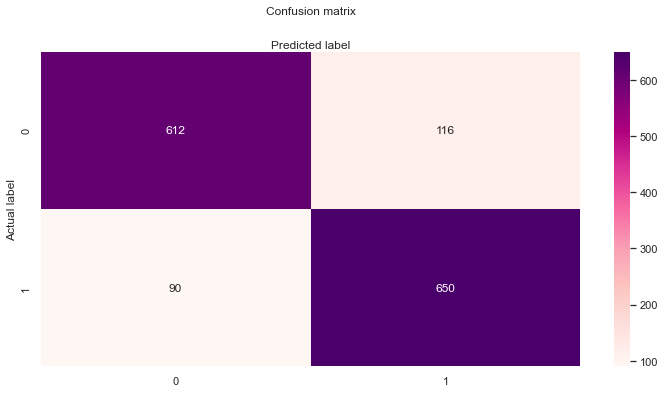

In [1808]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [1809]:
aughts = RF.feature_importances_
df_indep_columns = pd.DataFrame(columns)
df_aughts_feat = pd.DataFrame(aughts)
aughts_feat_vars = pd.concat([df_indep_columns, df_aughts_feat], axis = 1)
aughts_feat_vars.columns = ['Variable', 'Feature importance 00s']
aughts_feat_vars = aughts_feat_vars.set_index('Variable')
aughts_feat_vars = aughts_feat_vars.sort_values(by=['Feature importance 00s'], ascending = False)

In [1810]:
aughts_feat_vars

,Feature importance 00s
Variable,
instrumentalness,0.237667
danceability,0.117534
duration_min,0.101658
acousticness,0.098478
loudness,0.093757
energy,0.073436
valence,0.062371
speechiness,0.052747
tempo,0.041554


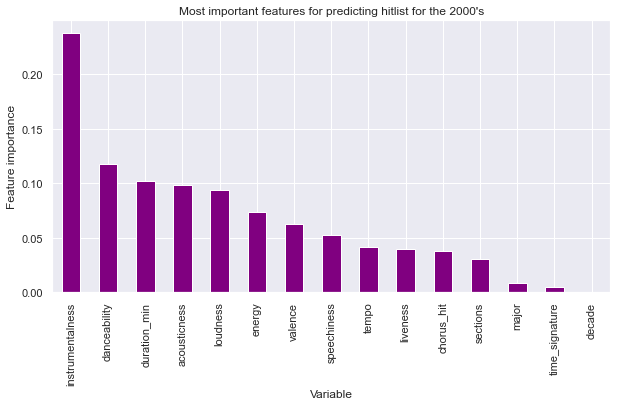

In [1811]:
aughts_feat_vars.plot(kind='bar', color = "purple", title = "Most important features for predicting hitlist for the 2000's", legend = None)
plt.savefig('aughts_feature_importance_bar.jpg')
plt.ylabel('Feature importance')
plt.show()


In [1812]:
print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))
print("Precision:",metrics.precision_score(y3_test, y3_pred))
print("Recall:",metrics.recall_score(y3_test, y3_pred))


Accuracy: 0.8596730245231607
Precision: 0.8485639686684073
Recall: 0.8783783783783784


In [1903]:
X = df[columns]
y = df['hitlist']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=None)
RF = RandomForestClassifier(n_estimators=200)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
rf_prob = RF.predict_proba(X_test)[::,1]
rf_pred = RF.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


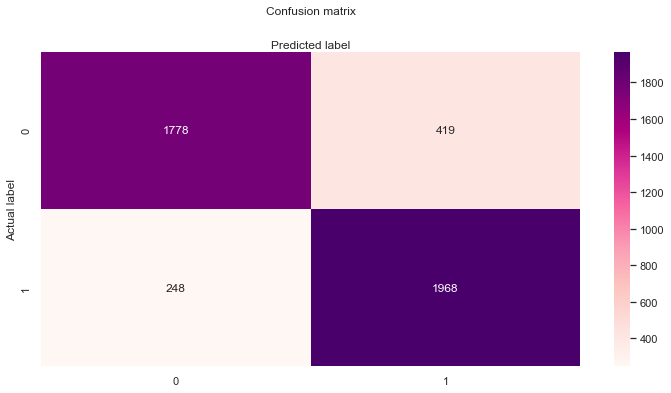

In [1814]:
plt.rcParams['figure.figsize']=(10,5)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [1904]:
all_decade = RF.feature_importances_
df_indep_columns = pd.DataFrame(columns)
df_all_decade = pd.DataFrame(all_decade)
all_decade = pd.concat([df_indep_columns, df_all_decade], axis = 1)
all_decade.columns = ['Variable', 'Feature importance all decades']
all_decade = all_decade.set_index('Variable')

all_decade = all_decade.sort_values(by=['Feature importance all decades'], ascending = False)

In [1816]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RF.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(8)

,importance
feature,
instrumentalness,0.213
danceability,0.124
acousticness,0.111
duration_min,0.083
loudness,0.082
energy,0.078
valence,0.066
speechiness,0.053


In [1817]:
all_decade.head(8)

,Feature importance all decades
Variable,
instrumentalness,0.213307
danceability,0.123905
acousticness,0.110878
duration_min,0.082679
loudness,0.081574
energy,0.078014
valence,0.065804
speechiness,0.053259


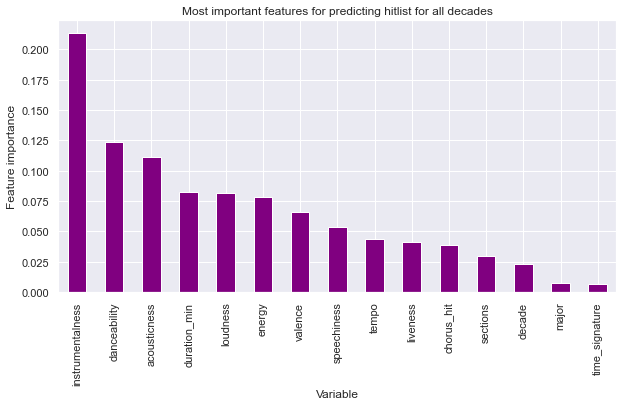

In [1818]:
all_decade.plot(kind='bar', color = ("purple"), title = "Most important features for predicting hitlist for all decades", legend = None)
plt.ylabel('Feature importance')
plt.show()

In [1819]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8488556537502833
Precision: 0.8244658567239213
Recall: 0.8880866425992779


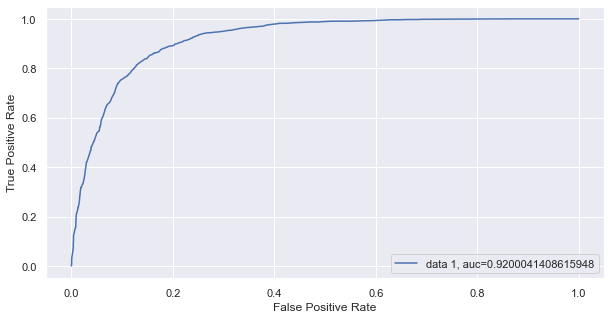

In [1820]:
RFprob = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  RFprob)
rfauc = metrics.roc_auc_score(y_test, RFprob)
plt.plot(fpr,tpr,label="data 1, auc="+str(rfauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1821]:
compare_feats = all_decade+ nineties_feat_vars + aughts_feat_vars + tens_feat_vars
compare_feats_df = pd.concat([all_decade, nineties_feat_vars, aughts_feat_vars, tens_feat_vars], axis = 1)
compare_feats_df

,Feature importance all decades,Feature importance 90s,Feature importance 00s,Feature importance 10s
Variable,,,,
instrumentalness,0.213307,0.151977,0.237667,0.258190
danceability,0.123905,0.147992,0.117534,0.088487
acousticness,0.110878,0.147400,0.098478,0.100366
duration_min,0.082679,0.041546,0.101658,0.072601
loudness,0.081574,0.083364,0.093757,0.104054
energy,0.078014,0.074164,0.073436,0.091868
valence,0.065804,0.068755,0.062371,0.064609
speechiness,0.053259,0.066645,0.052747,0.048021
tempo,0.043354,0.052529,0.041554,0.043843


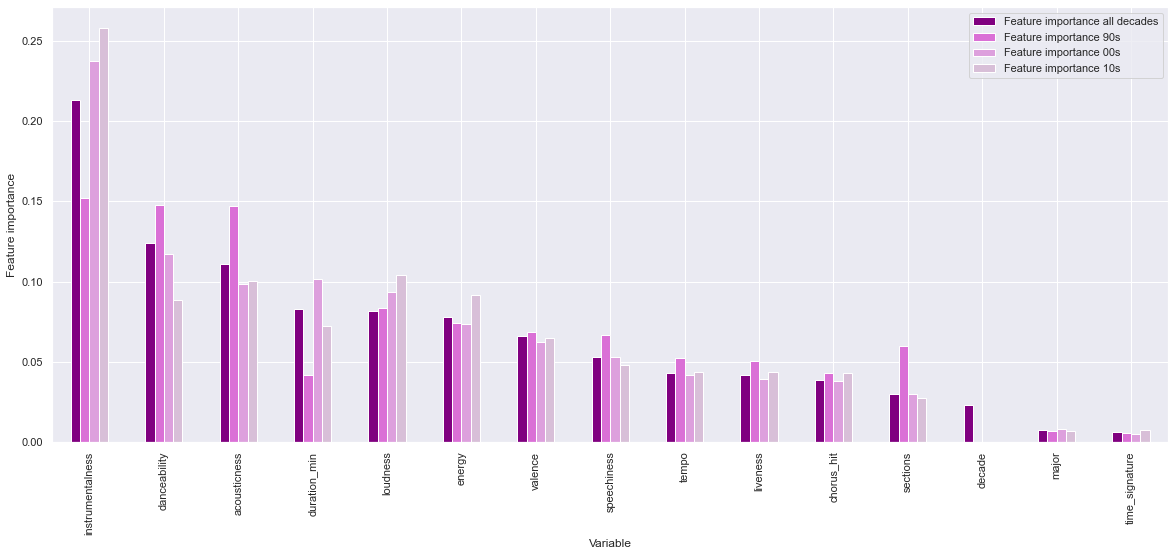

In [1822]:
compare_feats_df.plot(kind='bar', color = ('purple','orchid','plum','thistle' ), figsize = (20,8))
plt.ylabel("Feature importance")
plt.show()

In [1823]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model


In [1824]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

log_pred= logreg.predict(X_test)


gridsearch ngesearch di subset yang ditentuin (cara ngesearch pake crossvalidate)

crossvalidate ( kfold crossvalidation )



Text(0.5, 39.5, 'Predicted')

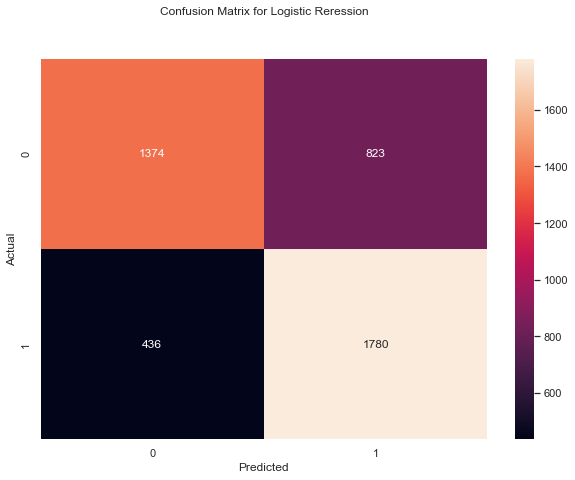

In [1825]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Logistic Reression', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1826]:
print("Accuracy: ",metrics.accuracy_score(y_test, log_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,log_pred))
print("Precision: ",metrics.precision_score(y_test, log_pred))
print("Recall: ",metrics.recall_score(y_test, log_pred))

Accuracy:  0.7147065488329934
Balanced Accuracy Score:  0.7143236839208044
Precision:  0.6838263542066846
Recall:  0.8032490974729242


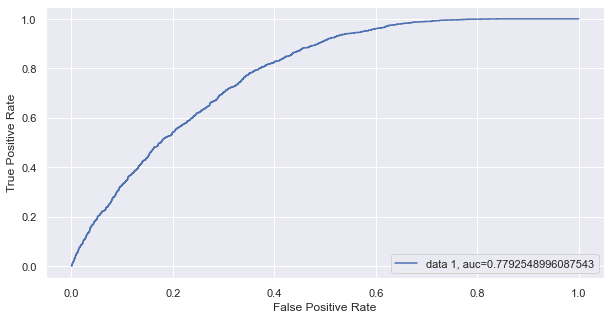

In [1827]:
log_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  log_prob)
lgauc = metrics.roc_auc_score(y_test, log_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(lgauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1828]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prob = nb.predict_proba(X_test)[::,1]

In [1829]:
nb_pred = nb.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, nb_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,nb_pred))
print("Precision: ",metrics.precision_score(y_test, nb_pred))
print("Recall: ",metrics.recall_score(y_test, nb_pred))

Accuracy:  0.7509630636755041
Balanced Accuracy Score:  0.7503135429178943
Precision:  0.6941258255126869
Recall:  0.901173285198556


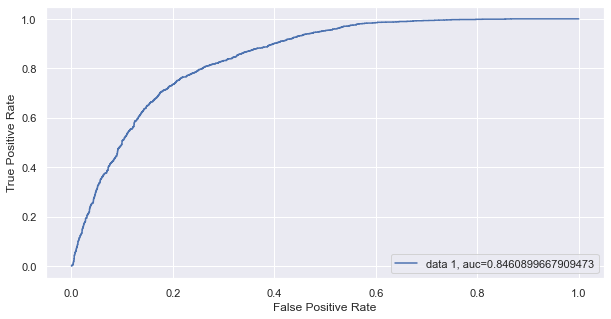

In [1830]:
nbfpr, nbtpr, _ = metrics.roc_curve(y_test, nb_prob)
nbauc = metrics.roc_auc_score(y_test, nb_prob)
plt.plot(nbfpr,nbtpr,label="data 1, auc="+str(nbauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

Text(0.5, 39.5, 'Predicted')

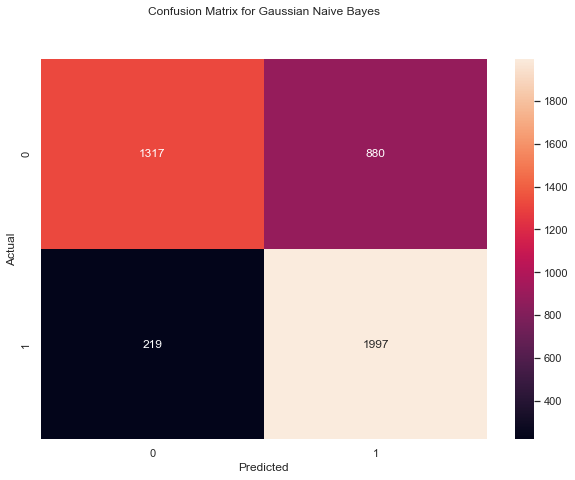

In [1831]:
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_nb, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Gaussian Naive Bayes', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1832]:
print('Random Forest: AUROC = %.4f' % (rfauc))
print('Naive Bayes: AUROC = %.4f' % (nbauc))
print('Logistic Regression: AUROC = %.4f' % (lgauc))

Random Forest: AUROC = 0.9200
Naive Bayes: AUROC = 0.8461
Logistic Regression: AUROC = 0.7793


In [1833]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [1834]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, RFprob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
lg_fpr, lg_tpr, _ = roc_curve(y_test, log_prob)


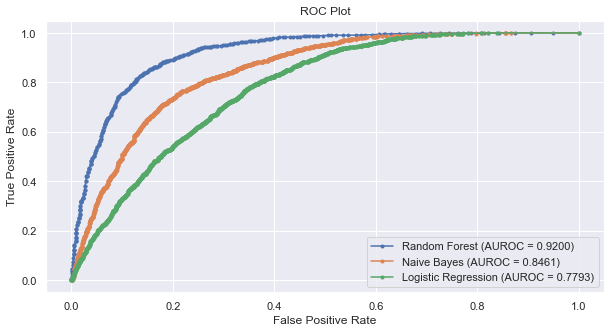

In [1835]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

In [1836]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [1837]:
XGB.fit(X_train, y_train)
XGG_pred= XGB.predict(X_test)

Text(0.5, 39.5, 'Predicted')

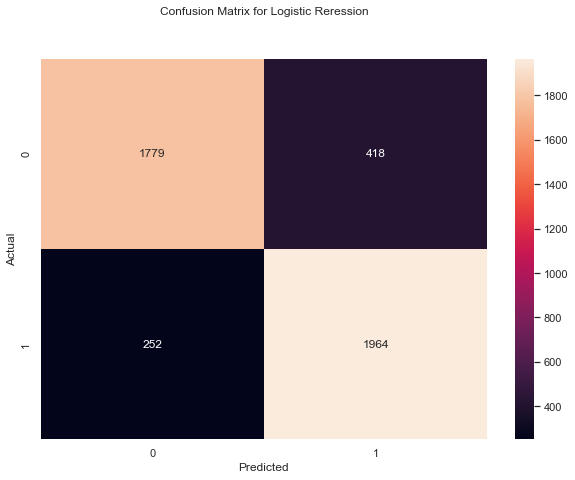

In [1838]:
cm = confusion_matrix(y_test, XGG_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Logistic Reression', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1839]:
print("Accuracy: ",metrics.accuracy_score(y_test, XGG_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(y_test,XGG_pred))
print("Precision: ",metrics.precision_score(y_test, XGG_pred))
print("Recall: ",metrics.recall_score(y_test, XGG_pred))

Accuracy:  0.8481758440969862
Balanced Accuracy Score:  0.8480110718751694
Precision:  0.8245172124265323
Recall:  0.8862815884476535


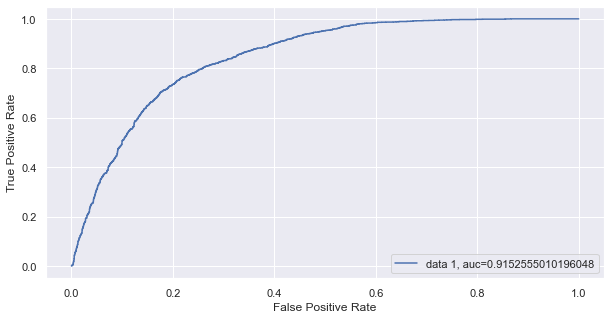

In [1840]:
XGB_prob = XGB.predict_proba(X_test)[::,1]
XGBfpr, XGBtpr, _ = metrics.roc_curve(y_test, XGB_prob)
XGBauc = metrics.roc_auc_score(y_test,XGB_prob)
plt.plot(nbfpr,nbtpr,label="data 1, auc="+str(XGBauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1841]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, RFprob)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)
lg_fpr, lg_tpr, _ = roc_curve(y_test, log_prob)
XGB_fpr, XGB_tpr , _ =roc_curve(y_test, XGB_prob)

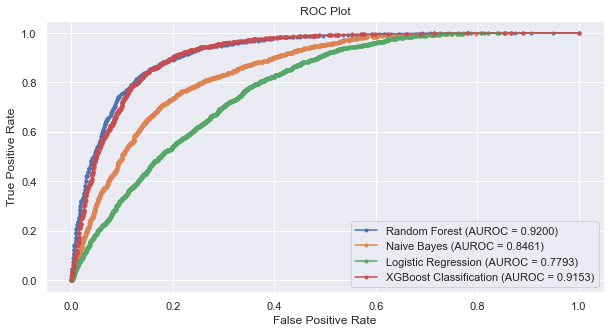

In [1842]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGBoost Classification (AUROC = %0.4f)' % XGBauc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

In [1843]:
print('Random Forest: AUROC = %.4f' % (rfauc))
print('Naive Bayes: AUROC = %.4f' % (nbauc))
print('Logistic Regression: AUROC = %.4f' % (lgauc))
print('XGBoost Classificattion: AUROC = %.4f' %(XGBauc))

Random Forest: AUROC = 0.9200
Naive Bayes: AUROC = 0.8461
Logistic Regression: AUROC = 0.7793
XGBoost Classificattion: AUROC = 0.9153


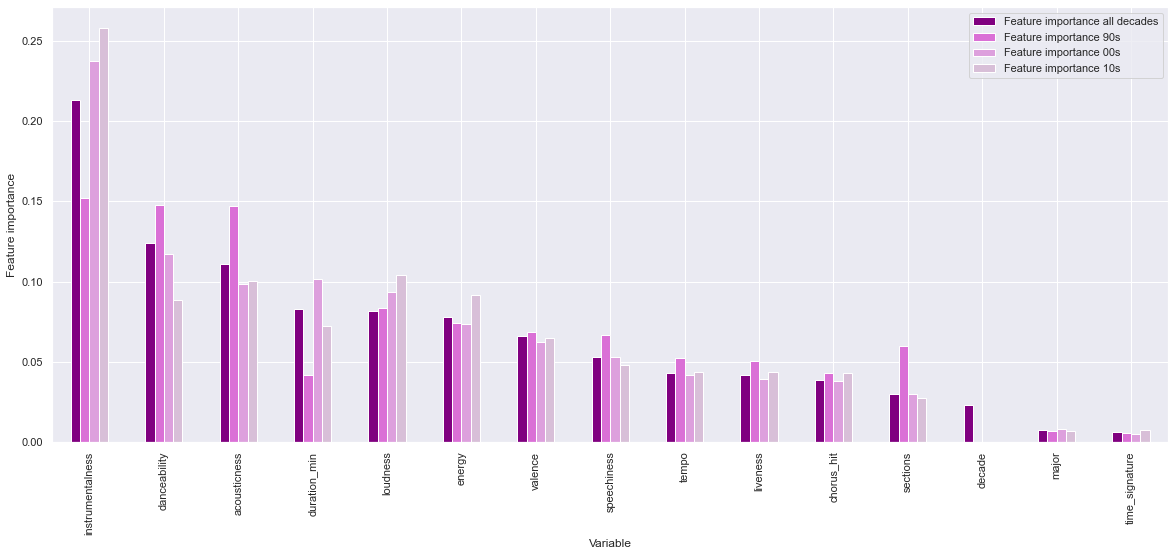

In [1871]:
compare_feats_df.plot(kind='bar', color = ('purple','orchid','plum','thistle' ), figsize = (20,8))
plt.ylabel("Feature importance")
plt.show()


In [1872]:
new_factors = df[['instrumentalness', 'danceability', 'acousticness', 'energy','duration_min','valence']]

In [1873]:
newx = new_factors
newy = df['hitlist']

newx_train, newx_test, newy_train, newy_test = train_test_split(newx,newy,test_size=0.25)

In [1874]:
logreg2 = LogisticRegression()

logreg2.fit(newx_train,newy_train)

newlg_pred = logreg2.predict(newx_test)

Text(0.5, 21.5, 'Predicted')

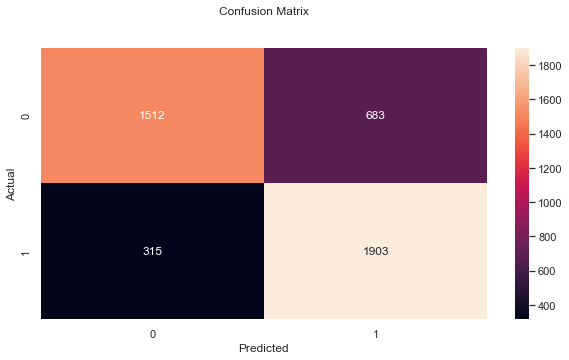

In [1875]:
cm_lg2 = metrics.confusion_matrix(newy_test, newlg_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cm_lg2), annot=True ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [1876]:
print("Accuracy: ",metrics.accuracy_score(newy_test, newlg_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(newy_test,newlg_pred))
print("Precision: ",metrics.precision_score(newy_test, newlg_pred))
print("Recall: ",metrics.recall_score(newy_test, newlg_pred))

Accuracy:  0.7738499886698391
Balanced Accuracy Score:  0.7734092155505483
Precision:  0.7358855375096675
Recall:  0.8579801623083859


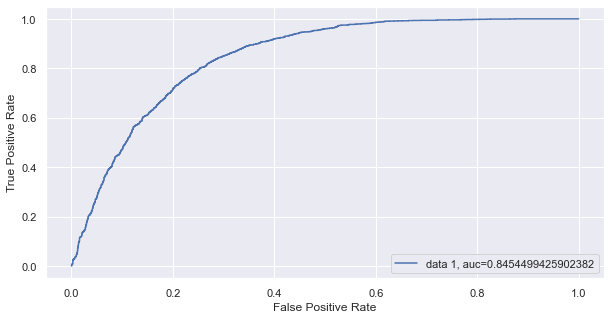

In [1877]:
newlg_prob = logreg2.predict_proba(newx_test)[::,1]
lg2fpr, lg2tpr, _ = metrics.roc_curve(newy_test,  newlg_prob)
lg2auc = metrics.roc_auc_score(newy_test, newlg_prob)
plt.plot(lg2fpr,lg2tpr,label="data 1, auc="+str(lg2auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1878]:
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(newx_train, newy_train)

newrf_prob = random_forest2.predict_proba(newx_test)[::,1]
newrf_pred = random_forest2.predict(newx_test)


Text(0.5, 21.5, 'Predicted')

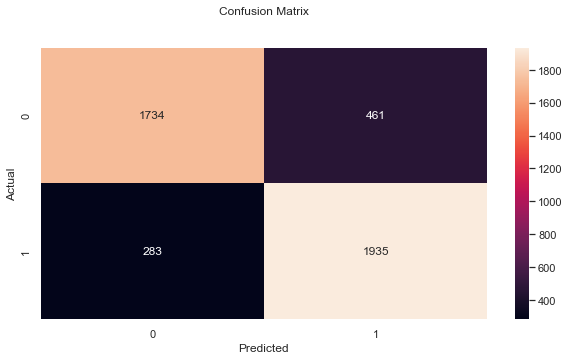

In [1879]:
cm_rf2 = metrics.confusion_matrix(newy_test, newrf_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sb.heatmap(pd.DataFrame(cm_rf2), annot=True ,fmt='g')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1880]:
print("Accuracy: ",metrics.accuracy_score(newy_test, newrf_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(newy_test,newrf_pred))
print("Precision: ",metrics.precision_score(newy_test, newrf_pred))
print("Recall: ",metrics.recall_score(newy_test, newrf_pred))

Accuracy:  0.831407205982325
Balanced Accuracy Score:  0.8311923976740316
Precision:  0.8075959933222037
Recall:  0.8724075743913435


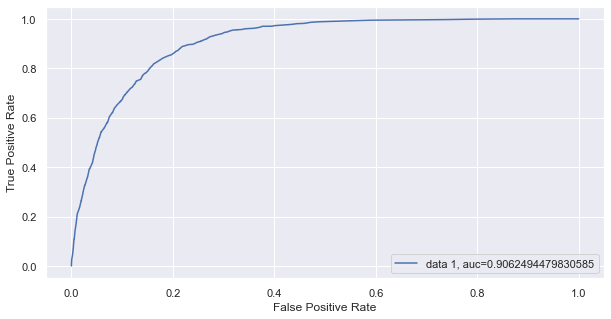

In [1881]:
newrffpr, newrftpr, _ = metrics.roc_curve(newy_test,  newrf_prob)
newrfauc = metrics.roc_auc_score(newy_test, newrf_prob)
plt.plot(newrffpr,newrftpr,label="data 1, auc="+str(newrfauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1882]:
nb2 = GaussianNB()
nb2.fit(newx_train, newy_train)
newnb_prob = nb2.predict_proba(newx_test)[::,1]

newnb_pred = nb2.predict(newx_test)

Text(0.5, 39.5, 'Predicted')

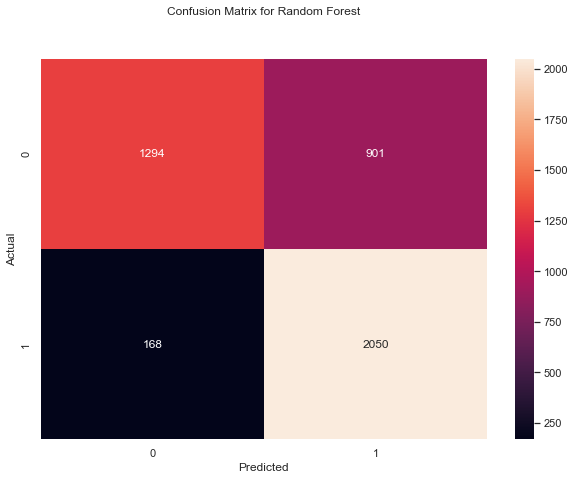

In [1883]:
cm_nb2 = confusion_matrix(newy_test, newnb_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_nb2, annot=True, fmt = 'g')
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1884]:
print("Accuracy: ",metrics.accuracy_score(newy_test, newrf_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(newy_test,newrf_pred))
print("Precision: ",metrics.precision_score(newy_test, newrf_pred))
print("Recall: ",metrics.recall_score(newy_test, newrf_pred))


Accuracy:  0.831407205982325
Balanced Accuracy Score:  0.8311923976740316
Precision:  0.8075959933222037
Recall:  0.8724075743913435


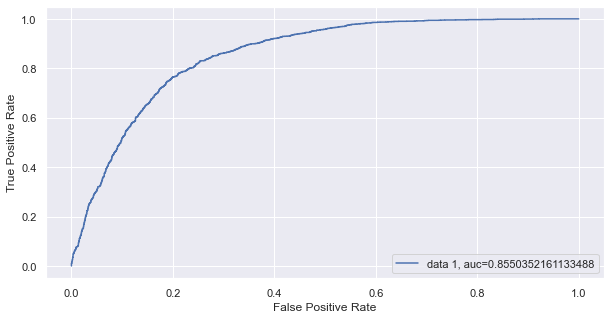

In [1885]:
nb2fpr, nb2tpr, _ = metrics.roc_curve(newy_test, newnb_prob)
newnbauc = metrics.roc_auc_score(newy_test, newnb_prob)
plt.plot(nb2fpr,nb2tpr,label="data 1, auc="+str(newnbauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1886]:
XGB1 = XGBClassifier()
XGB1.fit(newx_train, newy_train)
XGB1_prob = XGB1.predict_proba(newx_test)[::,1]

In [1887]:
XGB1_pred = XGB1.predict(newx_test)

Text(0.5, 39.5, 'Predicted')

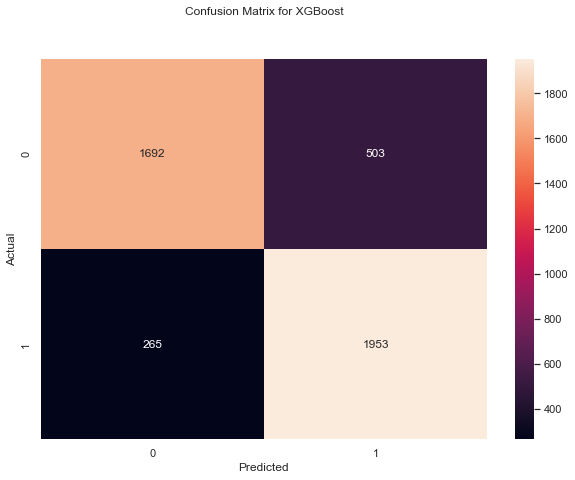

In [1888]:
cm_nb2 = confusion_matrix(newy_test, XGB1_pred)
plt.figure(figsize=(10,7))
sb.heatmap(cm_nb2, annot=True, fmt = 'g')
plt.title('Confusion Matrix for XGBoost', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [1889]:
print("Accuracy: ",metrics.accuracy_score(newy_test, XGB1_pred))
print("Balanced Accuracy Score: ",metrics.balanced_accuracy_score(newy_test,XGB1_pred))
print("Precision: ",metrics.precision_score(newy_test, XGB1_pred))
print("Recall: ",metrics.recall_score(newy_test, XGB1_pred))


Accuracy:  0.8259687287559483
Balanced Accuracy Score:  0.825682909144687
Precision:  0.7951954397394136
Recall:  0.8805229936880072


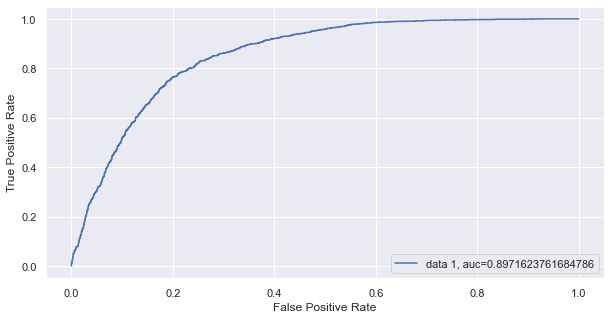

In [1890]:
XGB1fpr, XGB1tpr, _ = metrics.roc_curve(newy_test, XGB1_prob)
XGB1auc = metrics.roc_auc_score(newy_test, XGB1_prob)
plt.plot(nb2fpr,nb2tpr,label="data 1, auc="+str(XGB1auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [1891]:

print('Random Forest: AUROC = %.4f' % (newrfauc))
print('Naive Bayes: AUROC = %.4f' % (newnbauc))
print('Logistic Regression: AUROC = %.4f' % (lg2auc))
print('XGBoost: AUROC = %.4f' % (XGB1auc))


Random Forest: AUROC = 0.9062
Naive Bayes: AUROC = 0.8550
Logistic Regression: AUROC = 0.8454
XGBoost: AUROC = 0.8972


In [1892]:
compar = pd.DataFrame(np.array([[XGBauc, XGB1auc], [rfauc, newrfauc], [nbauc, newnbauc], [lgauc, lg2auc]]), 
                      columns=['Old ROC AUC', 'New ROC AUC'], 
                      index =['XGboost ','Random Forest', 'Gaussian Naive Bayes', 'Logistic Regression'])
compar

,Old ROC AUC,New ROC AUC
XGboost,0.915256,0.897162
Random Forest,0.920004,0.906249
Gaussian Naive Bayes,0.846090,0.855035
Logistic Regression,0.779255,0.845450


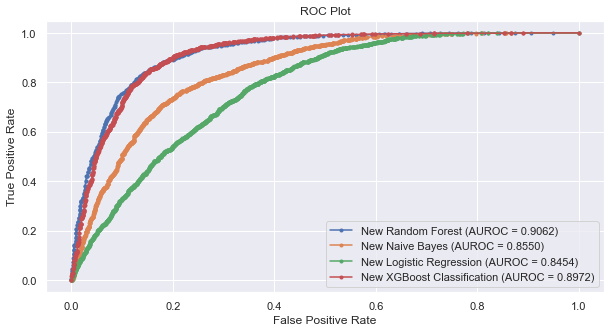

In [1893]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='New Random Forest (AUROC = %0.4f)' % newrfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='New Naive Bayes (AUROC = %0.4f)' % newnbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='New Logistic Regression (AUROC = %0.4f)' % lg2auc)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='New XGBoost Classification (AUROC = %0.4f)' % XGB1auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

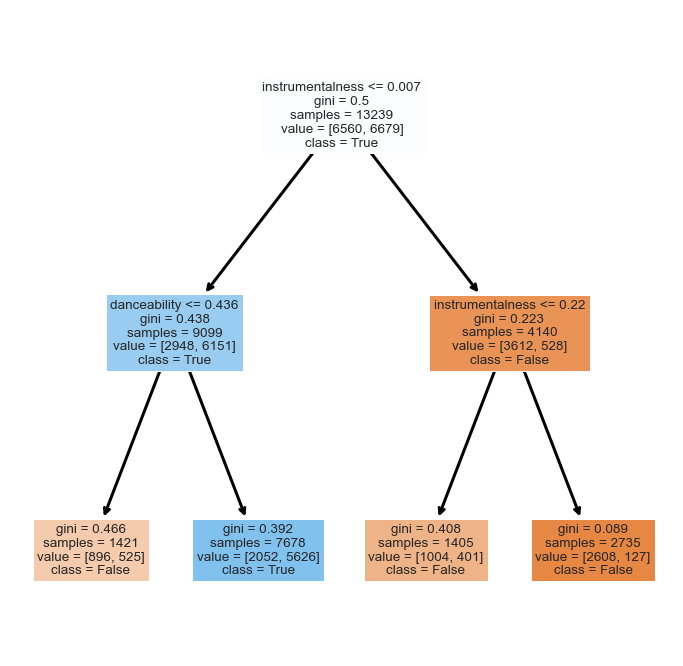

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7654656696125085

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7659188760480399



<AxesSubplot:>

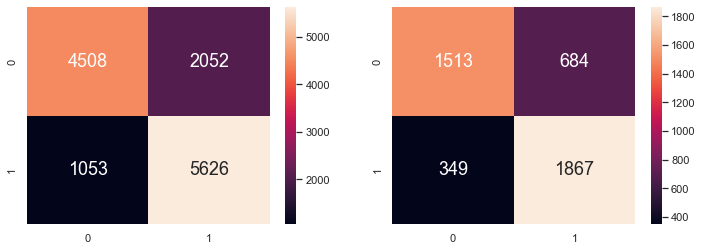

In [1894]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

   max_depth Accuracy (Train Data) Accuracy (Test Data)
0        1.0              0.737442              0.73782
1        2.0              0.765466             0.765919
2        3.0              0.779666             0.773623
3        4.0              0.805574             0.796964
4        5.0              0.819548               0.8092
5        6.0               0.82763             0.812373
6        7.0              0.841604             0.819397
7        8.0              0.854219             0.820304
8        9.0              0.867362             0.817584
9       10.0              0.887152             0.815998
10      11.0              0.902183             0.807614
11      12.0              0.917516             0.803082
12      13.0              0.930206             0.799683
13      14.0              0.943274             0.801949
14      15.0              0.953773             0.792885



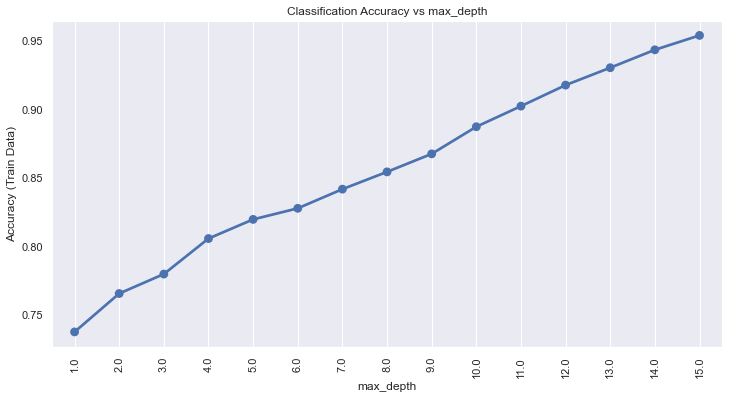

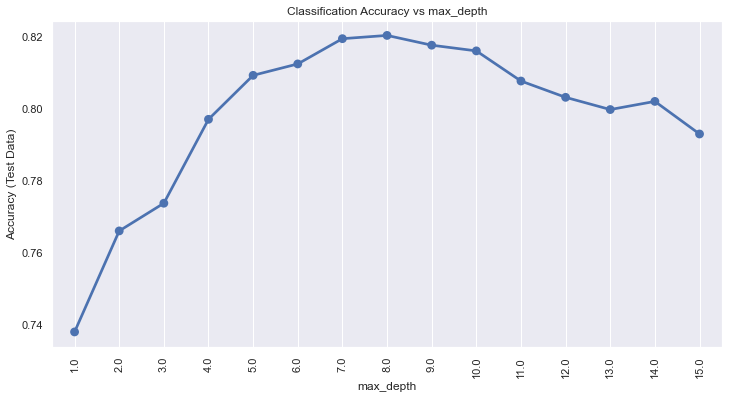

In [1867]:
# To find the optimal value of max_depth, we test the accuracy for the model when max_depth ranges from 1 to 15.
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy = pd.DataFrame(columns=[c_parameter_name, 'Accuracy (Train Data)', 'Accuracy (Test Data)'])

# Here, we create a loop to test the accuracy of the model with different values of max_depth.
# Important Note: we only specify the max_depth and random_state values and set the rest of the parameters to default values in this model. 
for input_parameter in c_parameter_values:
    model = DecisionTreeClassifier(max_depth=input_parameter, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acctr_score = model.score(X_train, y_train)
    accte_score = model.score(X_test, y_test)
    accuracy = accuracy.append({c_parameter_name : input_parameter , 'Accuracy (Train Data)' : acctr_score, 'Accuracy (Test Data)' : accte_score}, ignore_index=True)
    
print(accuracy)
print("")
plt.figure(figsize=(12,6))
sb.pointplot(x=c_parameter_name, y="Accuracy (Train Data)", data=accuracy)
title = 'Classification Accuracy vs ' + c_parameter_name 
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()

plt.figure(figsize=(12,6))
sb.pointplot(x=c_parameter_name, y="Accuracy (Test Data)", data=accuracy)
title = 'Classification Accuracy vs ' + c_parameter_name 
plt.title(title)
plt.xticks(rotation= 90)
plt.grid()


DecisionTreeClassifier(max_depth=8, min_samples_leaf=17, random_state=42)


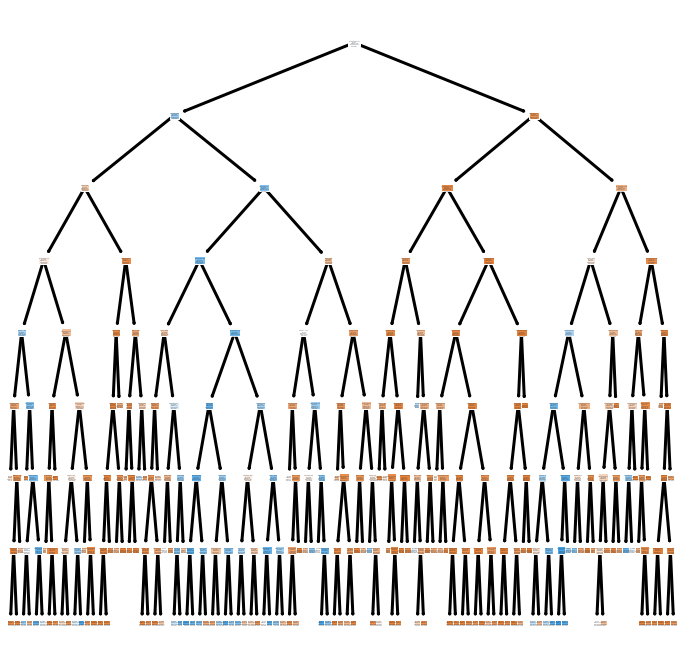

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8422841604350781

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8148651710854294



<AxesSubplot:>

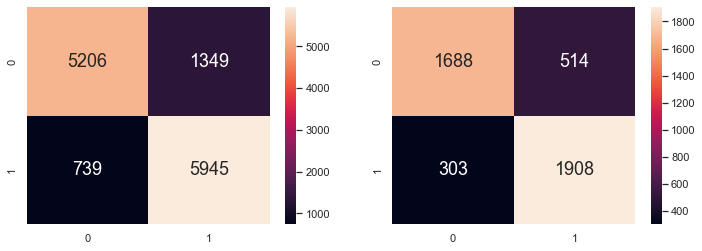

In [1905]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 3, shuffle=True, random_state=268)
param_grid = {'max_depth': np.arange(1,15),
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2),
              'random_state' : [42]}

#create a grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs=-1, cv=skf)

#training
grid_tree.fit(X_train, y_train)

#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)

best_tree.fit(X_train, y_train)     

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(best_tree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in best_tree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", best_tree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", best_tree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


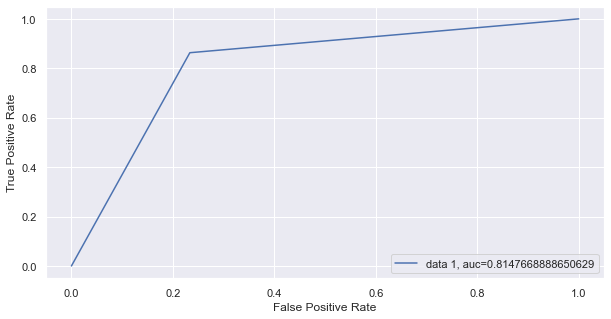

In [1906]:
dtfpr, dttpr, _ = metrics.roc_curve(y_test, y_test_pred)
dtauc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(dtfpr,dttpr,label="data 1, auc="+str(dtauc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

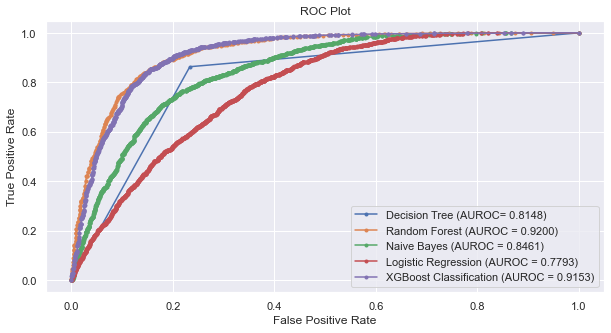

In [1908]:
plt.plot(dtfpr, dttpr, marker='.',label='Decision Tree (AUROC= %0.4f)' %dtauc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rfauc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.4f)' % nbauc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.4f)' % lgauc)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGBoost Classification (AUROC = %0.4f)' % XGBauc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()